# Data Scientist Salary EDA Project
                    prepared by Edidiong Udoh

Data science jobs are one of the fastest-growing, most in-demand in technology. Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

Goal of this project is to explore every feature in the dataset to answer questions relating to:

  * Work Year Analysis(with Salary, Remote Ratio);
  
  * Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size);
  
  * Company Location Analysis (with Experience Level);
  
  * Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd

# visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Inspection

In [2]:
# Load the data set
ds = pd.read_csv(r"C:\Users\user\Documents\DATA ANALYSIS FILES\10ALYTICS\Excel-CSV\ds_salaries.csv")

# view first 5 rows
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# last 2 rows
ds.tail(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [4]:
'''It is best practice to make a copy of the original Dataframe for reference purpose since changes will be made 
   during cleaning'''

# the copied dataframe will be used through out the EDA

ds1 = ds.copy()
ds1.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


#### Knowing the Data Set


* work_year - The year the salary was paid.
* experience_level - The experience level in the job during the year with the following possible values: EN Entry-level /                        Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* employment_type - The type of employment for the role: PT Part-time FT Full-time CT Contract FL Freelance
* job_title - The role worked in during the year.
* salary - The total gross salary amount paid.
* salary_currency - The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio - The overall amount of work done remotely; possible values are as follows: 0 No remote work (less than 20%)                  50 Partially remote 100 Fully remote (more than 80%)
* company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size - The average number of people that worked for the company during the year: S less than 50 employees (small)                  M 50 to 250 employees (medium) L more than 250 employees (large)


In [5]:
# Dimension of the dataset
ds.shape

(607, 12)

In [6]:
# missing data check
ds.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Statistical description

ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
# General information about the data set

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


#### Data Cleaning

In [9]:
# Removing redundant columns - using indexing

ds1.drop(ds1.columns[[0, 5, 6]], axis = 1, inplace = True)

ds1.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S


In [10]:
# Renaming some values for easy understand and visualization within columns

# For Experience_level Column - replace EN, MI, SE, EX with Entry, Mid, Senior and Expert Respectively.
ds1['experience_level'].replace('EN', 'Entry', inplace=True)
ds1['experience_level'].replace('MI', 'Mid', inplace=True)
ds1['experience_level'].replace('SE', 'Senior', inplace=True)
ds1['experience_level'].replace('EX', 'Expert', inplace=True)

# For Employment_type Column - replace CT, FL, FT, PT with Contract, Freelance, Full_Time and Part_Time Respectively.
ds1['employment_type'].replace('CT', 'Contract', inplace=True)
ds1['employment_type'].replace('FL', 'Freelance', inplace=True)
ds1['employment_type'].replace('FT', 'Full_Time', inplace=True)
ds1['employment_type'].replace('PT', 'Part_Time', inplace=True)

# For Remote_ratio Column - replace 0, 50, 100 with No(<20%), Partial(50%)  and Full(>80%) Respectively.
ds1['remote_ratio'].replace(0, 'No(<20%)', inplace=True)
ds1['remote_ratio'].replace(50, 'Partial(50%)', inplace=True)
ds1['remote_ratio'].replace(100, 'Full(>80%)', inplace=True)

# For Company_size Column - repalce S, M, L with Small(<50), Medium(<250), and Large(>250) Respectively.
ds1['company_size'].replace('S', 'Small(<50)', inplace=True)
ds1['company_size'].replace('M', 'Medium(<250)', inplace=True)
ds1['company_size'].replace('L', 'Large(>250)', inplace=True)

#view
ds1.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full_Time,Data Scientist,79833,DE,No(<20%),DE,Large(>250)
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,JP,No(<20%),JP,Small(<50)
2,2020,Senior,Full_Time,Big Data Engineer,109024,GB,Partial(50%),GB,Medium(<250)
3,2020,Mid,Full_Time,Product Data Analyst,20000,HN,No(<20%),HN,Small(<50)
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,US,Partial(50%),US,Large(>250)


## EDA

### Univariate

In [11]:
# Job Title Count

ds1['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Text(0, 0.5, 'Count')

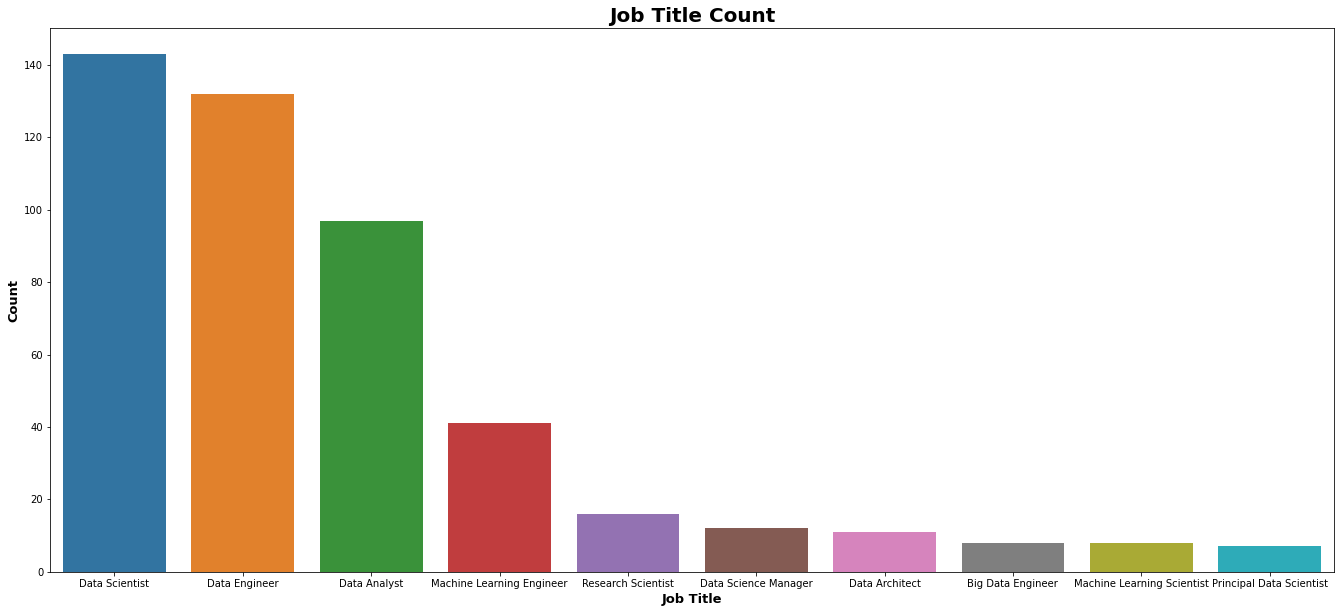

In [12]:
# Job Title Count Visualization - Top 10
ds_jt = ds1['job_title'].value_counts()[:10]

plt.figure(figsize= (23,10))
sns.barplot(x = ds_jt.index, y = ds_jt)
plt.title("Job Title Count", fontsize=20,weight=("bold"))
plt.xlabel("Job Title", fontsize=13,weight=("bold"))
plt.ylabel("Count", fontsize=13,weight=("bold"))

Data Scientist are the highest employed, followed by Data Engineer

In [13]:
# Company Location Count

ds1['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Text(0, 0.5, 'Count')

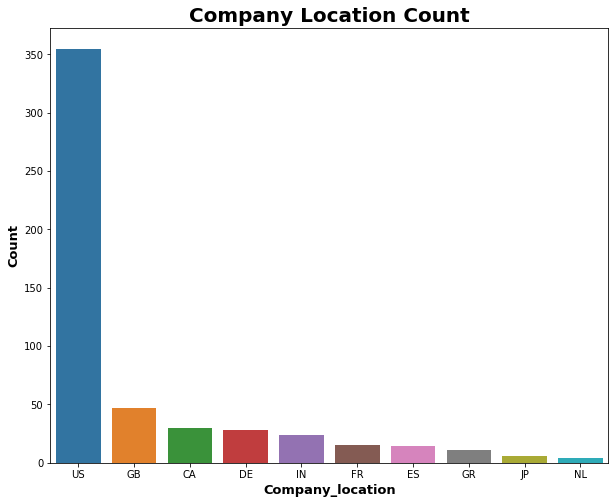

In [14]:
# Company Location Count Visualization - Top 10
ds_cl = ds1['company_location'].value_counts()[:10]

plt.figure(figsize= (10,8))
sns.barplot(x = ds_cl.index, y = ds_cl)
plt.title("Company Location Count", fontsize=20,weight=("bold"))
plt.xlabel("Company_location", fontsize=13,weight=("bold"))
plt.ylabel("Count", fontsize=13,weight=("bold"))

US has the highest demand 

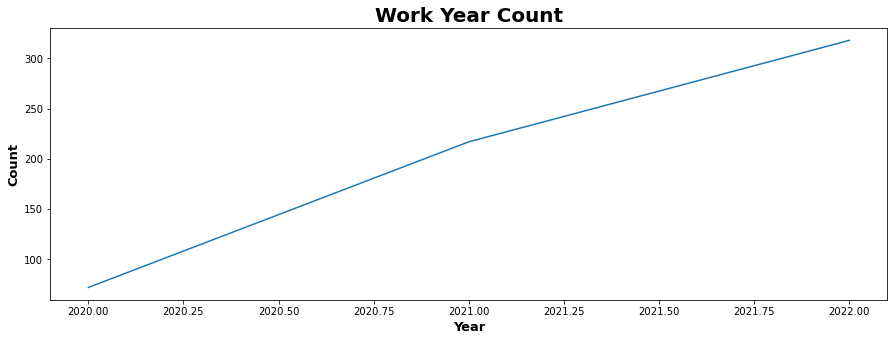

In [15]:
# Work Year Count

ds_wy = ds1['work_year'].value_counts()
ds_wy


#Visualization
plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain')
plt.plot(ds_wy.index, ds_wy)
plt.title("Work Year Count", fontsize=20,weight=("bold"))
plt.xlabel("Year", fontsize=13,weight=("bold"))
plt.ylabel("Count", fontsize=13,weight=("bold"))
plt.show()

There is an increase in the trend as the year goes by

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

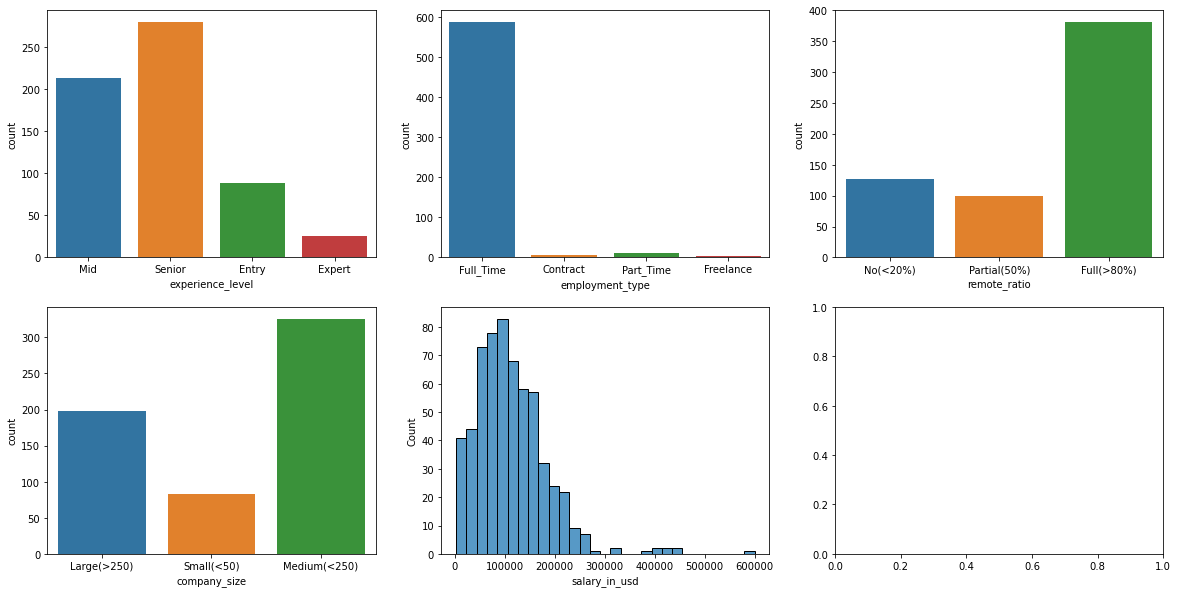

In [16]:
#### For the other Univariate Analysis, we will create a subplot

#Categorical data - Bar
fig, axes = plt.subplots(2,3, figsize = (20,10))
sns.countplot(x = "experience_level", data = ds1, ax = axes[0,0])
sns.countplot(x = "employment_type", data = ds1, ax = axes[0,1])
sns.countplot(x = "remote_ratio", data = ds1, ax = axes[0,2])
sns.countplot(x = "company_size", data = ds1, ax = axes[1,0])

#Numerical data - Histogram
sns.histplot(x = "salary_in_usd", data = ds1, ax = axes[1,1])

### Bivariate

##### Work Year Analysis

<AxesSubplot:title={'center':'Remote Ratio by Work Year'}, xlabel='work_year', ylabel='count'>

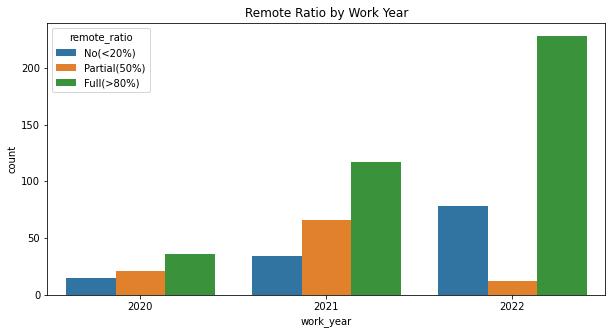

In [39]:
# Remote Ratio by Work Year

plt.figure(figsize = (10,5))
plt.title('Remote Ratio by Work Year')
sns.countplot(hue = "remote_ratio", data = ds1, x = "work_year")


Across the 3 years, Fully Remote workers were more, followed by Partial Remote workers except for 2022 where No remote workers were more than Partial remote workers.

##### Experience Level Analysis

<AxesSubplot:title={'center':'Employment Type by Experience Level'}, xlabel='count', ylabel='employment_type'>

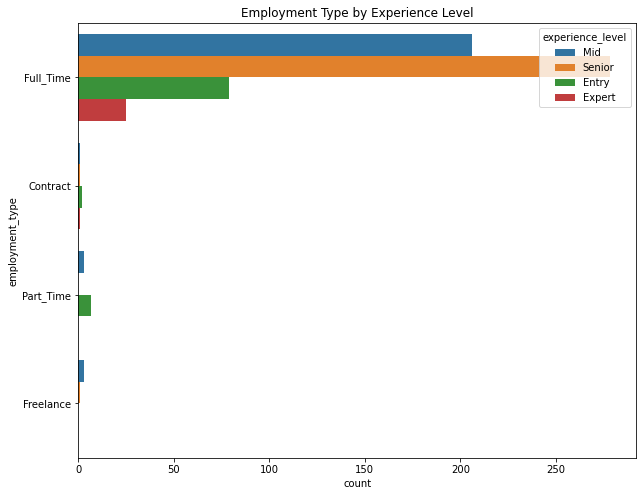

In [61]:
# Employment Type by Experience Level

plt.figure(figsize = (10,8))
plt.title('Employment Type by Experience Level')
sns.countplot(hue = "experience_level", data = ds1, y = "employment_type")

Most of the workers which are Full-time workers were Senior experienced level workers, for Contract and Part-time workers most were Entry experienced level, while for Freelance workers most were Mid experienced level workers.

<AxesSubplot:title={'center':'Top 3 Job Title by Experience Level'}, xlabel='count', ylabel='job_title'>

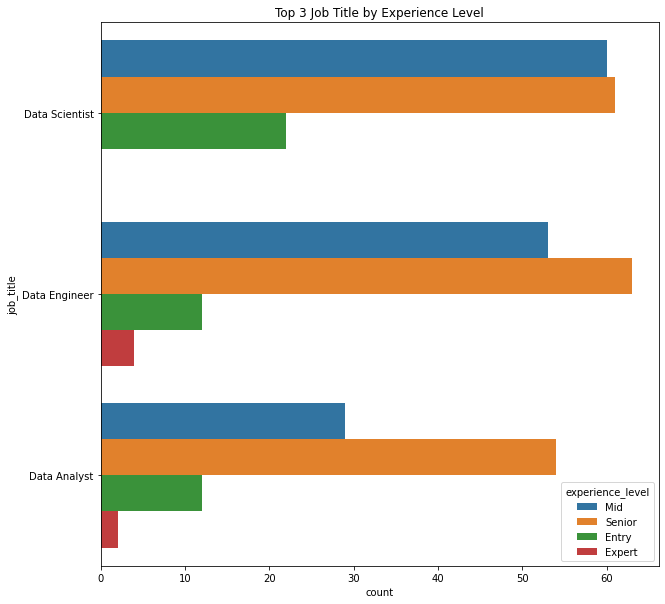

In [133]:
# Top 3 Job Title by Experience Level

orders=ds1['job_title'].value_counts().index[:3]
plt.figure(figsize = (10,10))
plt.title('Top 3 Job Title by Experience Level')
sns.countplot(hue = "experience_level", data = ds1, y = "job_title", order=orders)

For the top 3 job titles, Senior experience level workers were they highest, followed by mid experience level

<AxesSubplot:title={'center':'Company Size by Experience Level'}, xlabel='company_size', ylabel='count'>

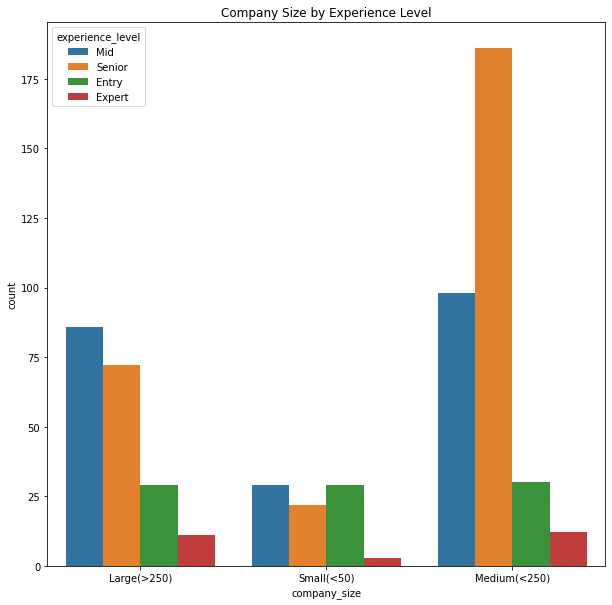

In [135]:
# Company Size by Experience Level

plt.figure(figsize = (10,10))
plt.title('Company Size by Experience Level')
sns.countplot(hue = "experience_level", data = ds1, x = "company_size")

Companies with work force greater than 250 staff (Large size) had more of the Mid Experience level staff, same as the companies with work force less than 50 staff (Small size), while for the companies with work force less than 250 (between 51-249 staff - Medium size) had more of the Senior Experience level staff.

##### Company Location Analysis


<AxesSubplot:title={'center':'Company Location by Experience Level'}, xlabel='company_location', ylabel='count'>

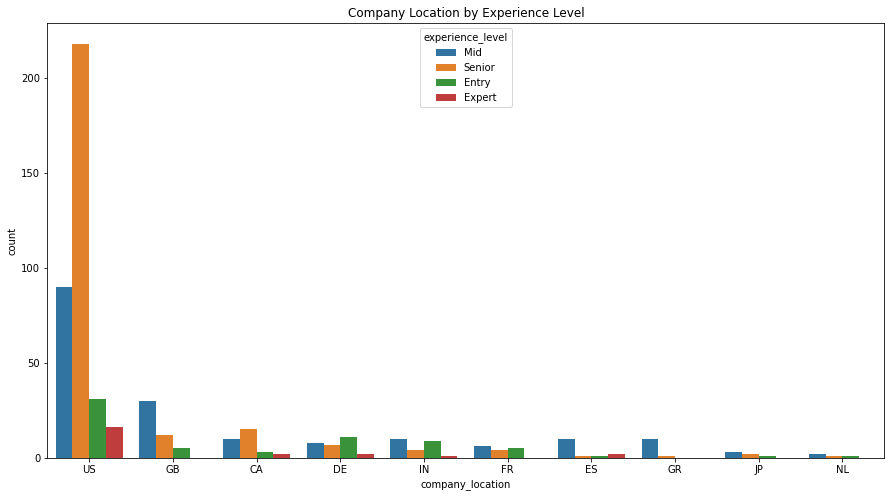

In [140]:
# Experience Level
orders = ds1['company_location'].value_counts().index[:10]
plt.figure(figsize = (15,8))
plt.title('Company Location by Experience Level')
sns.countplot(hue = "experience_level", data = ds1, x = "company_location", order = orders)

Using the Top 10 company location, US had more of the Senior Experience level staff, same with CA, while for company locations GB, IN, FR, ES, GR, JP and NL, they had more of the Mid Experience level staff, this was different for company location DE, as most of the staff were Entry Experience level.

##### Salary Analysis



<AxesSubplot:title={'center':'Salary by Work Year'}, xlabel='work_year', ylabel='salary_in_usd'>

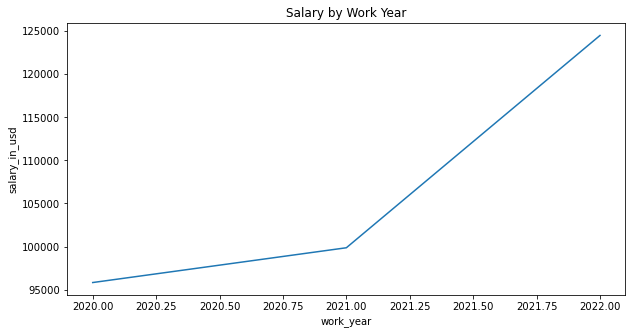

In [156]:
# Salary by work year

plt.figure(figsize = (10,5))
plt.title('Salary by Work Year')
sns.lineplot(y = "salary_in_usd", data = ds1, x = "work_year",  ci = None)


There was an increasing trend in the salary rate across the years, with 2022 having more than 20% increasement from the previous year(s).

<AxesSubplot:title={'center':'Salary by Experience Level'}, xlabel='experience_level', ylabel='salary_in_usd'>

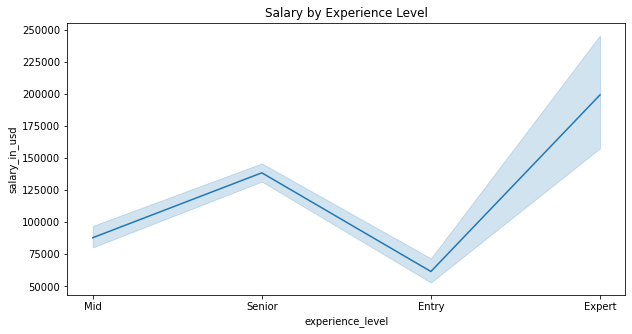

In [157]:
# Salary by Experience Level

plt.figure(figsize = (10,5))
plt.title('Salary by Experience Level')
sns.lineplot(y = "salary_in_usd", data = ds1, x = "experience_level")

The higher the experience level, the higher the salary rate. This means that Experts earn the most, like Entry level earns the least.

<AxesSubplot:title={'center':'Salary by Company Size'}, xlabel='company_size', ylabel='salary_in_usd'>

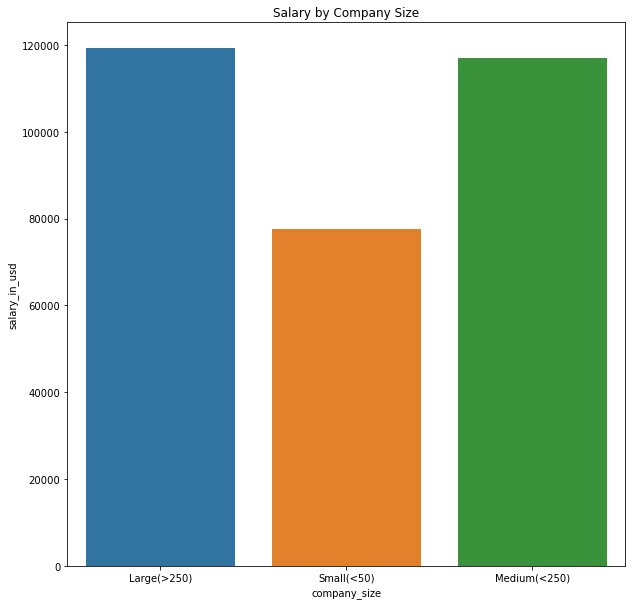

In [163]:
# Salary by Company Size

plt.figure(figsize = (10,10))
plt.title('Salary by Company Size')
sns.barplot(y = "salary_in_usd", data = ds1, x = "company_size", ci = None)

The larger the company size, the more the earning/salary. 

In [171]:
# Highest salaries by job title - Top 5

JTS = ds1.groupby('job_title').salary_in_usd.sum().sort_values(ascending = False)[:5]
JTS

job_title
Data Scientist               15470860
Data Engineer                14879700
Data Analyst                  9010627
Machine Learning Engineer     4300086
Data Architect                1956613
Name: salary_in_usd, dtype: int64

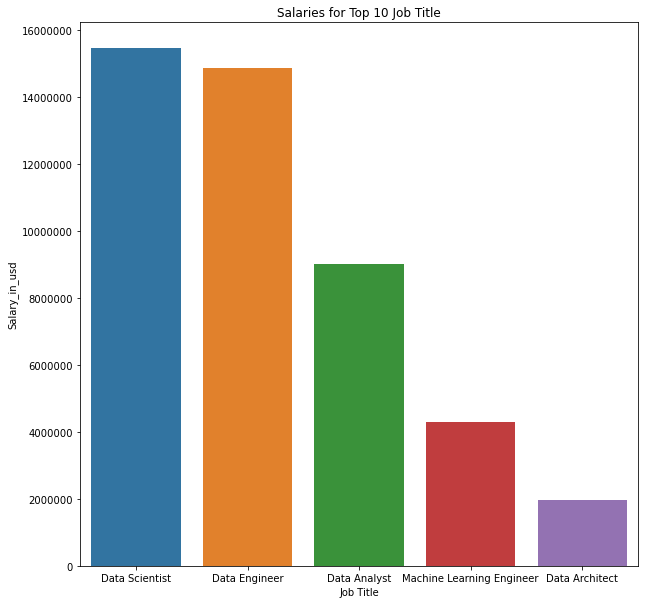

In [175]:
# Plotting for Highest salaries by job title

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
plt.title('Salaries for Top 10 Job Title')
sns.barplot(y = JTS, x = JTS.index)

# Labelling the axis
plt.xlabel('Job Title')
plt.ylabel('Salary_in_usd')

plt.show()

Data Scientist earn the highest salary, followed by Data Engineer

In [210]:
# Average Salary by Company Location

CSSavg = ds1.groupby('company_location').salary_in_usd.mean().astype(int).sort_values(ascending = False)[:10]


CSSsum = ds1.groupby('company_location').salary_in_usd.sum().astype(int).sort_values(ascending = False)[:10]

print (CSSavg, CSSsum)

company_location
RU    157500
US    144055
NZ    125000
IL    119059
JP    114127
AU    108042
AE    100000
DZ    100000
IQ    100000
CA     99823
Name: salary_in_usd, dtype: int32 company_location
US    51139618
GB     3834403
CA     2994712
DE     2292842
FR      959560
ES      742842
IN      685962
JP      684764
GR      575224
AU      324128
Name: salary_in_usd, dtype: int32


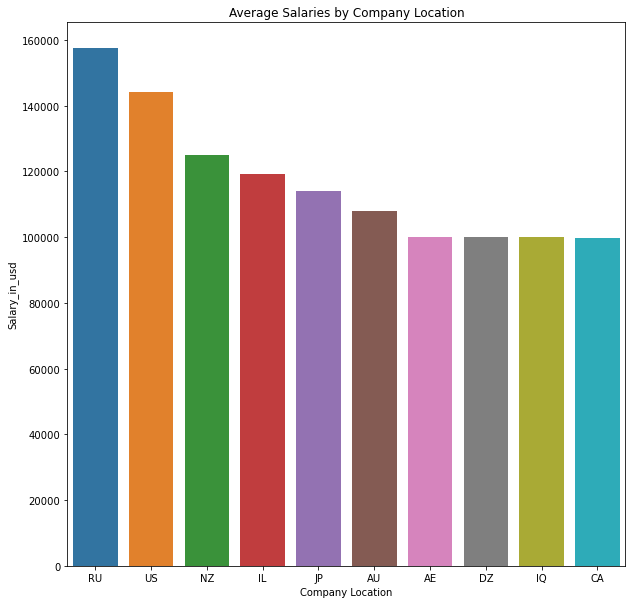

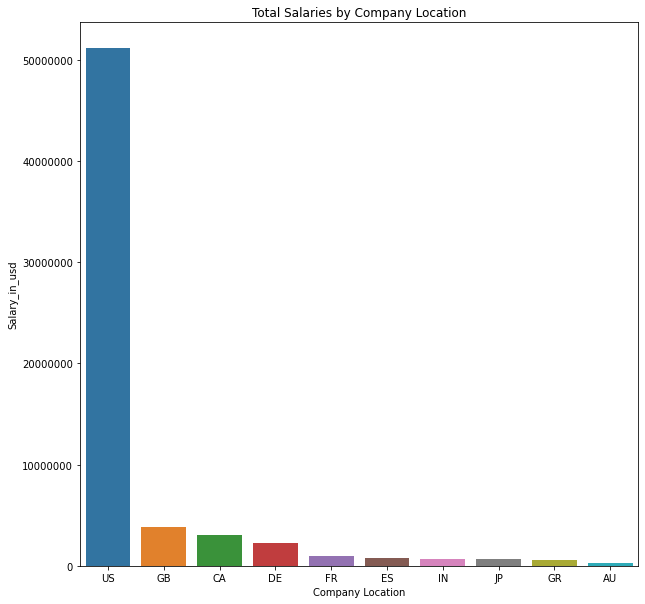

In [211]:
# Plotting for Average salaries by company location

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
plt.title('Average Salaries by Company Location')
sns.barplot(y = CSSavg, x = CSSavg.index)

# Labelling the axis
plt.xlabel('Company Location')
plt.ylabel('Salary_in_usd')

plt.show()


# Plotting for Sum salaries by company location

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
plt.title('Total Salaries by Company Location')
sns.barplot(y = CSSsum, x = CSSsum.index)

# Labelling the axis
plt.xlabel('Company Location')
plt.ylabel('Salary_in_usd')

plt.show()

Company Location RU (Russia) has the highest average salary earned, followed by US, but when drawing inference from the Total salary earned, US has the highest followed by GB.

*Note: when using the average, the value of the dividing factor (denominator) has a great influence on the result, meaning, the bigger the value of the denominator, the small the value of the result.
This explains why RA has the highest average salary earned and US has the highest total salary earned

<AxesSubplot:title={'center':'Salary by Remote Ratio'}, xlabel='remote_ratio', ylabel='salary_in_usd'>

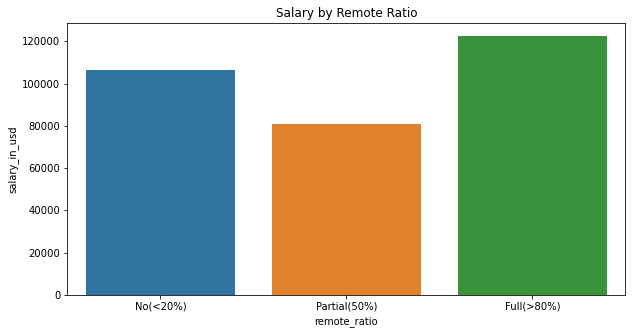

In [223]:
# Salary by Remote Ratio

plt.figure(figsize = (10,5))
plt.title('Salary by Remote Ratio')
sns.barplot(x = "remote_ratio", data = ds1, y = "salary_in_usd", ci = None)

Fully Remote workers earned most.

<AxesSubplot:title={'center':'Salary by Employment Type'}, xlabel='employment_type', ylabel='salary_in_usd'>

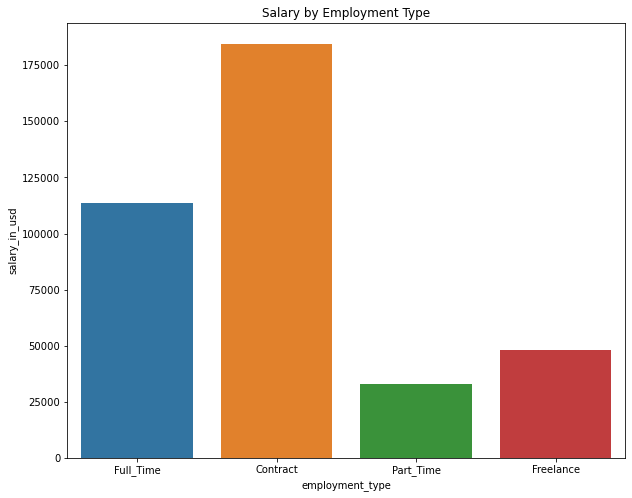

In [228]:
# Salary by Employment Type

plt.figure(figsize = (10,8))
plt.title('Salary by Employment Type')
sns.barplot(y = "salary_in_usd", data = ds1, x = "employment_type", ci = None)

Contract workers earned more, followed by Full time workers, Part Time workers earned least.

### Multivariate

<AxesSubplot:title={'center':'Salary by Year per Top 5 Job Title'}, xlabel='job_title', ylabel='salary_in_usd'>

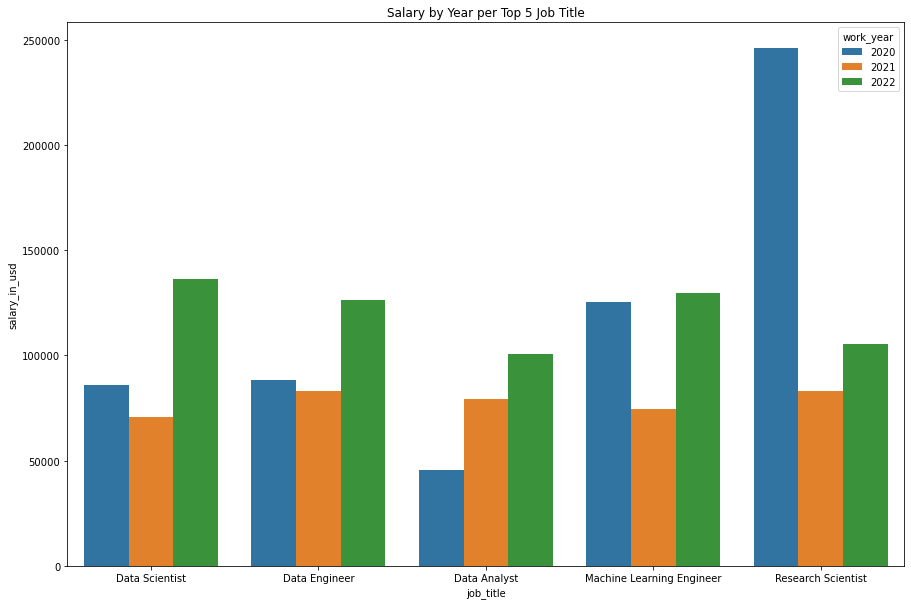

In [218]:
# Salary by Year per Top 5 Job Title

orders=ds1['job_title'].value_counts().index[:5]
plt.figure(figsize = (15,10))
plt.title('Salary by Year per Top 5 Job Title')
sns.barplot(hue = "work_year", data = ds1, y = "salary_in_usd", x = "job_title", order=orders, ci = None)

In the Year 2020 and 2021, Research Scientist earned most compared to others, but in 2022, Data Scientist earned the most, followed by ML Engineer and Data Engineer.

<AxesSubplot:title={'center':'Salary by Year per Experience Level'}, xlabel='experience_level', ylabel='salary_in_usd'>

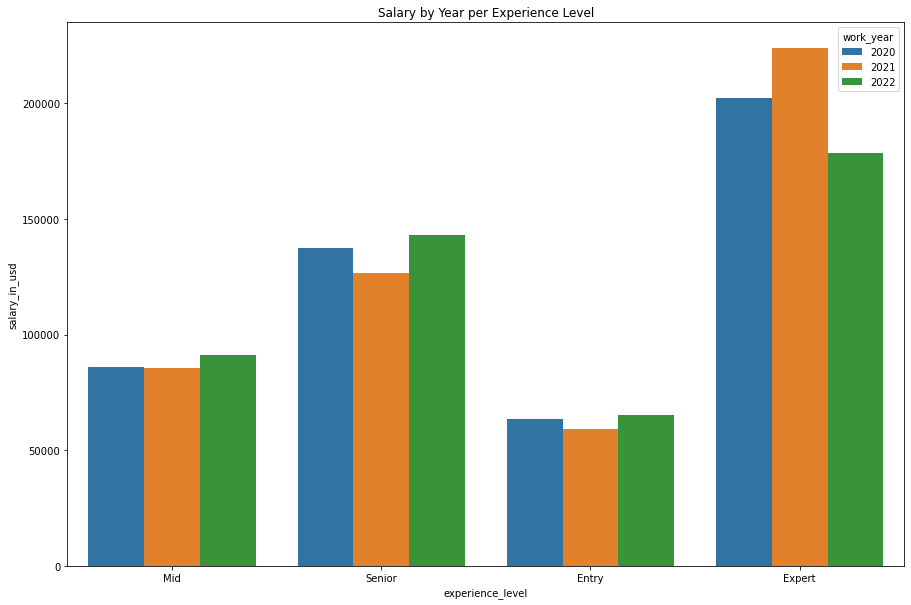

In [219]:
# Salary by Year per Experience Level

plt.figure(figsize = (15,10))
plt.title('Salary by Year per Experience Level')
sns.barplot(hue = "work_year", data = ds1, y = "salary_in_usd", x = "experience_level", ci = None)

Across all the years, Expert level of experience earned the highest salary.

<AxesSubplot:title={'center':'Salary by Remote Ratio per Year'}, xlabel='remote_ratio', ylabel='salary_in_usd'>

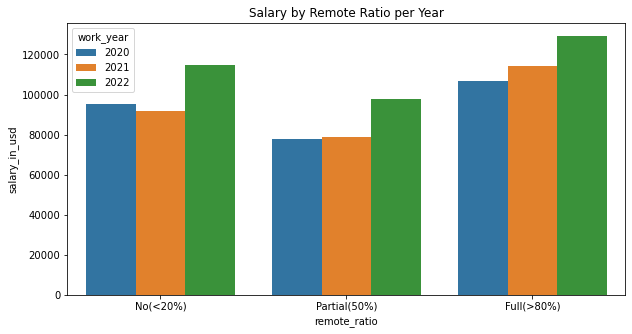

In [225]:
# Salary by Remote Ratio per year

plt.figure(figsize = (10,5))
plt.title('Salary by Remote Ratio per Year')
sns.barplot(x = "remote_ratio", data = ds1, y = "salary_in_usd", hue = "work_year", ci = None)

Across the years, Fully remote workers earned more, their earning increased as the year passed by.

Text(0.5, 1.0, 'Correlation')

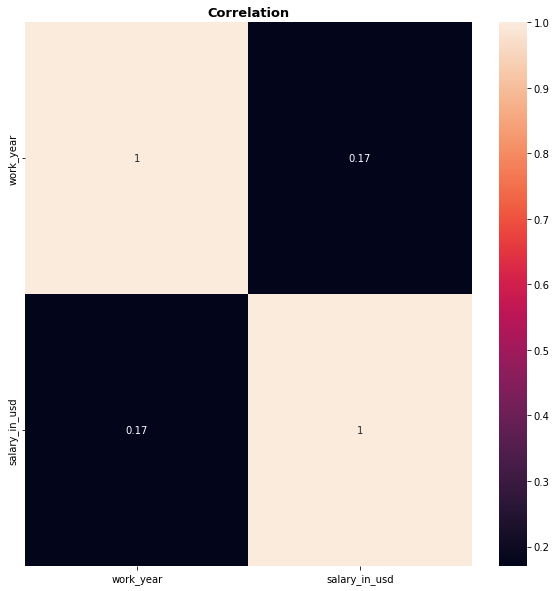

In [221]:
#view of relationships between numerical column

plt.figure(figsize=(10,10))
sns.heatmap(ds1.corr(),annot=True)
plt.title('Correlation', fontsize=13,weight=("bold"))

There is a weak corelation between work year and salary, this explains the increasing trend between the work year and salary i.e increase in salary rate across the year.

## Summary of the Observations

* Data Scientists are highest in demand, compared to other job titles followed by Data Engineers and Data Analysts.
* Countries with high demand for these Tech skills include; US (355 persons), GB (47 persons) and CA (30 persons).
* The demand and popularity of these Tech skill increased yearly by over 90% as at 2022.
* There are more of the Senior Experience level personnel, Full Time working personnel, Fully Remote working personnel, and more of the Medium (between 51 and 249 workers) company size.
* Work Year Analysis: From 2020-2022, Fully Remote workers dominated the work space.
* Experience Level Analysis: Most of the workers, specifically the Full-time workers were Senior experienced level workers. For the top 3 job titles, Senior experience level workers were they highest. Companies with work force greater than 250 staff (Large size) had more of the Mid Experience level staff, same as the companies with work force less than 50 staff (Small size), while for the companies with work force less than 250 (between 51-249 staff - Medium size) had more of the Senior Experience Level Staff.
* Salary Analysis: There was an increasing trend in the salary rate across the years, with 2022 having more than 20% increasement from the previous year(s). The higher the experience level, the higher the salary rate. This means that, Experts earned the most (across 2020-2022), Entry level earned the least. Data Scientist earned the highest salary, followed by Data Engineer, though in the Year 2020 and 2021, Research Scientist earned more, compared to others; But in 2022, Data Scientist earning was on the increase. Fully Remote workers earned highest. Contract workers earned more, Part Time workers earned least. Company Located at RU (Russia) has the highest average salary earning, followed by US, but when drawing inference from the Total salary earning, US has the highest followed by GB.

*Note: when using the average, the value of the dividing factor (denominator) has a great influence on the result, meaning, the bigger the value of the denominator, the small the value of the result.
This explains why RA has the highest average salary earned and US has the highest total salary earned.

## Conclusion and Recommendation

* There have been an increasing trend in the popularity and demand of these tech skills in recent times with stage light focusing most on DATA SCIENTIST with highest pay and highest personnel.
* Though there are more of Senior Experience level workers, Expert Experience Level earned highest salary and though there are more of Full Time workers, Contract workers earned highest salary. Also, Companies located in ther US pays highest salary compared to other locations.


I will recommend that the information provided above be used to make decisions prior to joining or choosing which job title to go for, and other enquiry regarding the salary rate based on experience level, employment type and company location.